In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



In [29]:
def OrbitCOM(galaxy, start, end, n=3):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs: galaxy = name of the galaxy (MW, M31 or M33)
    start = start time of the snapshot
    end = end time of the snapshot
    n = number of intervals over which the function will compute the COM pos and velocity (in this case, 3).
    I am setting n = 3 as this will produce smooth graphs.
          
    returns: COM position and velocity as a function of time.
    """
    
    # filename for output
   
    fileout = 'Orbit_%s.txt'%(galaxy)
    
    #  setting tolerance and VolDec for calculating COM_P in CenterOfMass
    # Used VolDec = 4.0 for M33. Else adopted VolDec = 2.0 in other cases.
    if (galaxy == 'M33'):
        delta = 0.1
        VolDec = 4.0
    else:
        delta = 0.1
        VolDec = 2.0
    
    # generating the snapshot id sequence
    snap_ids = np.arange(start, end+1, n)
    # Checking if the initialized array is empty or not.
    if len(snap_ids == 0):
        print("The array is empty")
    
    # initialized the array for orbital info: t, x, y, z, vx, vy, vz of COM. 
    # Number of rows in orbit = number of rows in snap_ids. Number of columns = 7.
    orbit = np.zeros([np.size(snap_ids),7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over the files.
        
        # composing the data filename (referred HW 5 for this part)
        ilbl = '000'+ str(snap_id)
        ilbl = ilbl[-3:]
        filename = '%s_'% (galaxy) + ilbl + '.txt'
        # Initialize an instance of CenterOfMass class, using disk particles = 2
        COM = CenterOfMass(filename,2)
        # Store the COM pos and vel. An extra argument (VolDec) is required for COM_P.
        COMP = COM.COM_P(delta, VolDec)
        COMV = COM.COM_V(COMP[0],COMP[1],COMP[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value)
        time = COM.time/1000.0
        
        # *tuple(array) >> unfurls the array and takes each component as a seperate element
        # E.g.: *tuple(COMP) = COMP[0],COMP[1],COMP[2]
        orbit[i] = time.value, *tuple(COMP), *tuple(COMV)
        
        
        # print snap_id to see the progress (not necessary)
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    
# Acknowledgement: This code was completed with the assistance of Dr. Gurtina Besla
# and I highly appreciate her assistance in this.

In [ ]:
# Recover the orbits and generate the COM files for each galaxy
MWOrbit = OrbitCOM('MW',0,800)
# read in 800 snapshots in intervals of n=3

In [ ]:
M31Orbit = OrbitCOM('M31',0,800)

In [ ]:
M33Orbit = OrbitCOM('M33',0,800)

In [4]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt: 
# I accessed Orbit_MW.txt and told the program only to concentrate on columns 1,2 and 3 that represent x,y and z coordinates of MW's position.
MW_dist = np.genfromtxt('Orbit_MW.txt',dtype=None,names=None, usecols = (1,2,3))

# Similar reasoning for vx,vy and vz.
MW_vel = np.genfromtxt('Orbit_MW.txt',dtype=None,names=None, usecols = (4,5,6))


In [5]:
# Ditto process for M31
M31_dist = np.genfromtxt('Orbit_M31.txt',dtype=None,names=None, usecols = (1,2,3))
M31_vel = np.genfromtxt('Orbit_M31.txt',dtype=None,names=None, usecols = (4,5,6))

In [6]:
# ditto process for M33.
M33_dist = np.genfromtxt('Orbit_M33.txt',dtype=None,names=None, usecols = (1,2,3))
M33_vel = np.genfromtxt('Orbit_M33.txt',dtype=None,names=None, usecols = (4,5,6))

In [7]:
# generalized function to compute the magnitude of the difference between two, 3D vectors 
def Magnitude(array1, array2):
    # INPUTS: the name of the arrays (vectors) from which the components have to be imported.
    # RETURNS: the magnitude of the difference between the two vectors.
    
    X = array1[:,0] - array2[:,0] # difference in the x-components.
    
    Y = array1[:,1] - array2[:,1] # difference in y-components
    
    Z = array1[:,2] - array2[:,2] # difference in z-components.
    
    mag = np.sqrt(X**2 + Y**2 + Z**2) # magnitude of the difference of the two vectors.
    
    return mag


In [8]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
dist_MW_M31 = Magnitude(MW_dist,M31_dist) #position
vel_MW_M31 = Magnitude(MW_vel,M31_vel) # velocity

# of M33 and M31
dist_M33_M31 = Magnitude(M33_dist,M31_dist) #position
vel_M33_M31 = Magnitude(M33_vel,M31_vel) #velocity

Text(0.5, 1.0, 'Orbital path in 12 Gyr')

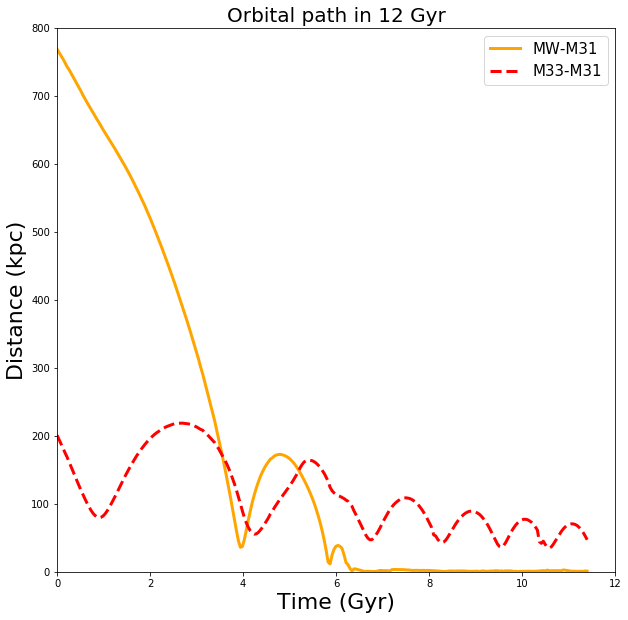

In [27]:
# Plot the Orbit of the galaxies 
#################################
# Setting the canvas:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# extracting the time values from Orbit_MW.txt
t = np.genfromtxt('Orbit_MW.txt',dtype=None,names=None, usecols = 0)

# plotting seperation between MW and M31 over a period of 12 Gyr.
plt.plot(t, dist_MW_M31, color='orange', linewidth=3, label='MW-M31')

# plotting seperation between M33 and M31 over a period of 12 Gyr.
plt.plot(t, dist_M33_M31, color='red', linewidth=3,linestyle = '--', label='M33-M31')

# the axes labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Distance (kpc)', fontsize=22)

# Axes limits:
plt.xlim(0,12)
plt.ylim(0,800)

# Customized legend
ax.legend(loc = 'upper right',frameon = True, prop={'size':15})

# plot title
plt.title('Orbital path in 12 Gyr', fontsize = 20)


Text(0.5, 1.0, 'Orbital velocity over 12 Gyr')

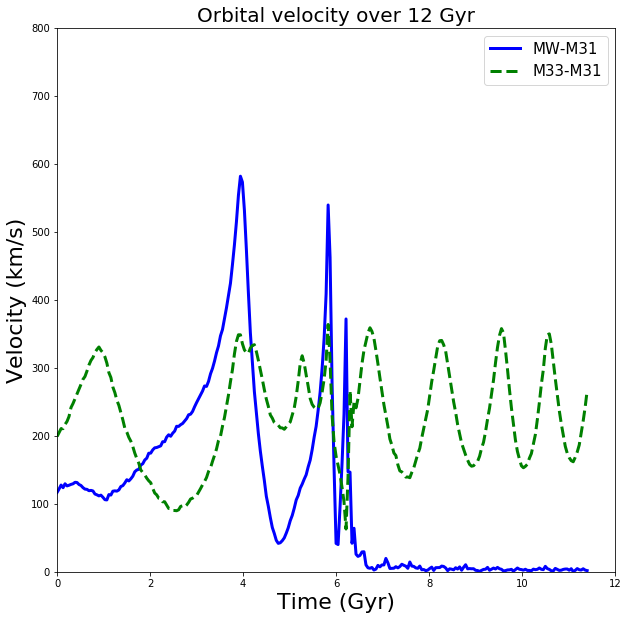

In [28]:
# Plot the orbital velocities of the galaxies 
#################################
# Setting up the canvas
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plotting orbital velocity of the MW-M31 system over 12 Gyr.
plt.plot(t, vel_MW_M31, color='blue', linewidth=3, label='MW-M31')

# Plotting orbital velocity of the M33-M31 system over 12 Gyr.
plt.plot(t, vel_M33_M31, color='green', linewidth=3, linestyle = '--',label='M33-M31')

# Axes labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Velocity (km/s)', fontsize=22)

# Axis limits
plt.xlim(0,12)
plt.ylim(0,800)

# Customized legend
ax.legend(loc = 'upper right',frameon = True, prop={'size':15})

# title of the plot
plt.title('Orbital velocity over 12 Gyr',fontsize = 20)